In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv(r'D:\work\who_life_exp.csv')

# knowing the data

In [3]:
df.shape

(3111, 32)

In [4]:
df.head(50)

,country,country_code,region,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,...,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_poverty,une_edu_spend,une_literacy,une_school
0,Angola,AGO,Africa,2000,47.33730,14.73400,383.5583,0.137985,0.025695,1.47439,...,1.90860,16395.473,122.2,46.522,1.0,2530.0,32.3,2.60753,NaN,NaN
1,Angola,AGO,Africa,2001,48.19789,14.95963,372.3876,0.133675,0.024500,1.94025,...,4.48352,16945.753,118.9,47.059,1.1,2630.0,NaN,NaN,67.40542,NaN
2,Angola,AGO,Africa,2002,49.42569,15.20010,354.5147,0.128320,0.023260,2.07512,...,3.32946,17519.417,115.1,47.702,1.2,3180.0,NaN,NaN,NaN,NaN
3,Angola,AGO,Africa,2003,50.50266,15.39144,343.2169,0.122040,0.021925,2.20275,...,3.54797,18121.479,110.8,48.440,1.3,3260.0,NaN,NaN,NaN,NaN
4,Angola,AGO,Africa,2004,51.52863,15.56860,333.8711,0.115700,0.020545,2.41274,...,3.96720,18758.145,106.2,49.263,1.3,3560.0,NaN,NaN,NaN,NaN
5,Angola,AGO,Africa,2005,52.72512,15.75107,322.7077,0.109205,0.018945,3.48640,...,2.85220,19433.602,101.3,50.165,1.4,4060.0,NaN,2.12011,NaN,NaN
6,Angola,AGO,Africa,2006,53.82273,15.92263,313.7094,0.103120,0.017360,4.02043,...,2.68554,20149.901,96.2,51.143,1.5,4450.0,NaN,2.28146,NaN,NaN
7,Angola,AGO,Africa,2007,54.97549,16.09804,302.8322,0.096850,0.015920,4.67969,...,2.97439,20905.363,91.0,52.177,1.6,5030.0,NaN,NaN,NaN,NaN
8,Angola,AGO,Africa,2008,56.12413,16.28414,292.1559,0.090765,0.014585,5.19452,...,3.32290,21695.634,85.8,53.243,1.6,5260.0,30.1,NaN,NaN,NaN
9,Angola,AGO,Africa,2009,57.29004,16.48146,281.0492,0.084800,0.013310,6.11778,...,3.84261,22514.281,80.7,54.311,1.7,5500.0,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3111 entries, 0 to 3110
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          3111 non-null   object 
 1   country_code     3111 non-null   object 
 2   region           3111 non-null   object 
 3   year             3111 non-null   int64  
 4   life_expect      3111 non-null   float64
 5   life_exp60       3111 non-null   float64
 6   adult_mortality  3111 non-null   float64
 7   infant_mort      3111 non-null   float64
 8   age1-4mort       3111 non-null   float64
 9   alcohol          3061 non-null   float64
 10  bmi              3077 non-null   float64
 11  age5-19thinness  3077 non-null   float64
 12  age5-19obesity   3077 non-null   float64
 13  hepatitis        2542 non-null   float64
 14  measles          3092 non-null   float64
 15  polio            3092 non-null   float64
 16  diphtheria       3092 non-null   float64
 17  basic_water   

In [6]:
df.describe()

,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,bmi,age5-19thinness,age5-19obesity,...,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_poverty,une_edu_spend,une_literacy,une_school
count,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3061.000000,3077.000000,3077.000000,3077.000000,...,2994.000000,3.074000e+03,3111.000000,3111.000000,2370.000000,2994.000000,913.000000,1825.00000,571.000000,805.000000
mean,2008.000000,69.146384,18.912060,193.527786,0.032496,0.003489,4.834781,25.052714,5.312447,5.972278,...,6.110353,3.707550e+04,30.488428,68.957352,2.038397,14964.832999,10.845893,4.53293,81.984472,9.712214
std,4.899767,9.129761,2.885412,114.007447,0.030361,0.005146,3.998741,2.193445,4.652408,4.530812,...,2.505267,1.378377e+05,27.756930,9.359194,4.593804,17495.137508,17.168798,1.75428,19.665588,2.854723
min,2000.000000,36.227360,10.728000,49.201850,0.001470,0.000065,0.000000,19.800000,0.100000,0.100000,...,1.025160,7.601600e+01,1.600000,39.441000,0.100000,420.000000,0.100000,0.78744,14.376040,0.559340
25%,2004.000000,63.200095,16.619485,108.269750,0.008255,0.000355,1.198030,23.300000,1.800000,2.000000,...,4.238798,2.195105e+03,8.000000,62.844500,0.100000,2970.000000,0.600000,3.26283,72.701130,7.735940
50%,2008.000000,71.597200,18.508260,164.822200,0.019995,0.000895,3.993560,25.500000,3.800000,5.200000,...,5.758030,8.544297e+03,19.500000,71.409000,0.400000,8340.000000,3.100000,4.42541,90.953740,10.270400
75%,2012.000000,75.537030,21.099175,250.832300,0.051720,0.004877,7.723420,26.500000,7.800000,8.900000,...,7.850327,2.509552e+04,48.050000,75.570645,1.500000,20482.500000,12.400000,5.49498,95.786975,12.070610
max,2016.000000,84.166160,26.394020,696.874200,0.164515,0.039095,20.182460,32.200000,28.100000,26.700000,...,20.413410,1.414049e+06,142.400000,83.984880,28.200000,122670.000000,94.100000,14.05908,99.998190,14.378800


# data cleaning

In [7]:
# drop the column which have higher null values
df.drop(['hospitals','une_poverty','une_literacy','une_school'],axis = 1, inplace = True)

In [8]:
df.columns

Index(['country', 'country_code', 'region', 'year', 'life_expect',
       'life_exp60', 'adult_mortality', 'infant_mort', 'age1-4mort', 'alcohol',
       'bmi', 'age5-19thinness', 'age5-19obesity', 'hepatitis', 'measles',
       'polio', 'diphtheria', 'basic_water', 'doctors', 'gni_capita', 'gghe-d',
       'che_gdp', 'une_pop', 'une_infant', 'une_life', 'une_hiv', 'une_gni',
       'une_edu_spend'],
      dtype='object')

In [9]:
# drop effectless column
df.drop(['country_code'],axis = 1, inplace = True)

In [10]:
# drop those rows which dont have atleast 18 non-missing values
df = df.dropna(thresh = 18)
df.reset_index(inplace = True)

In [11]:
df.shape

(3098, 28)

# correlations

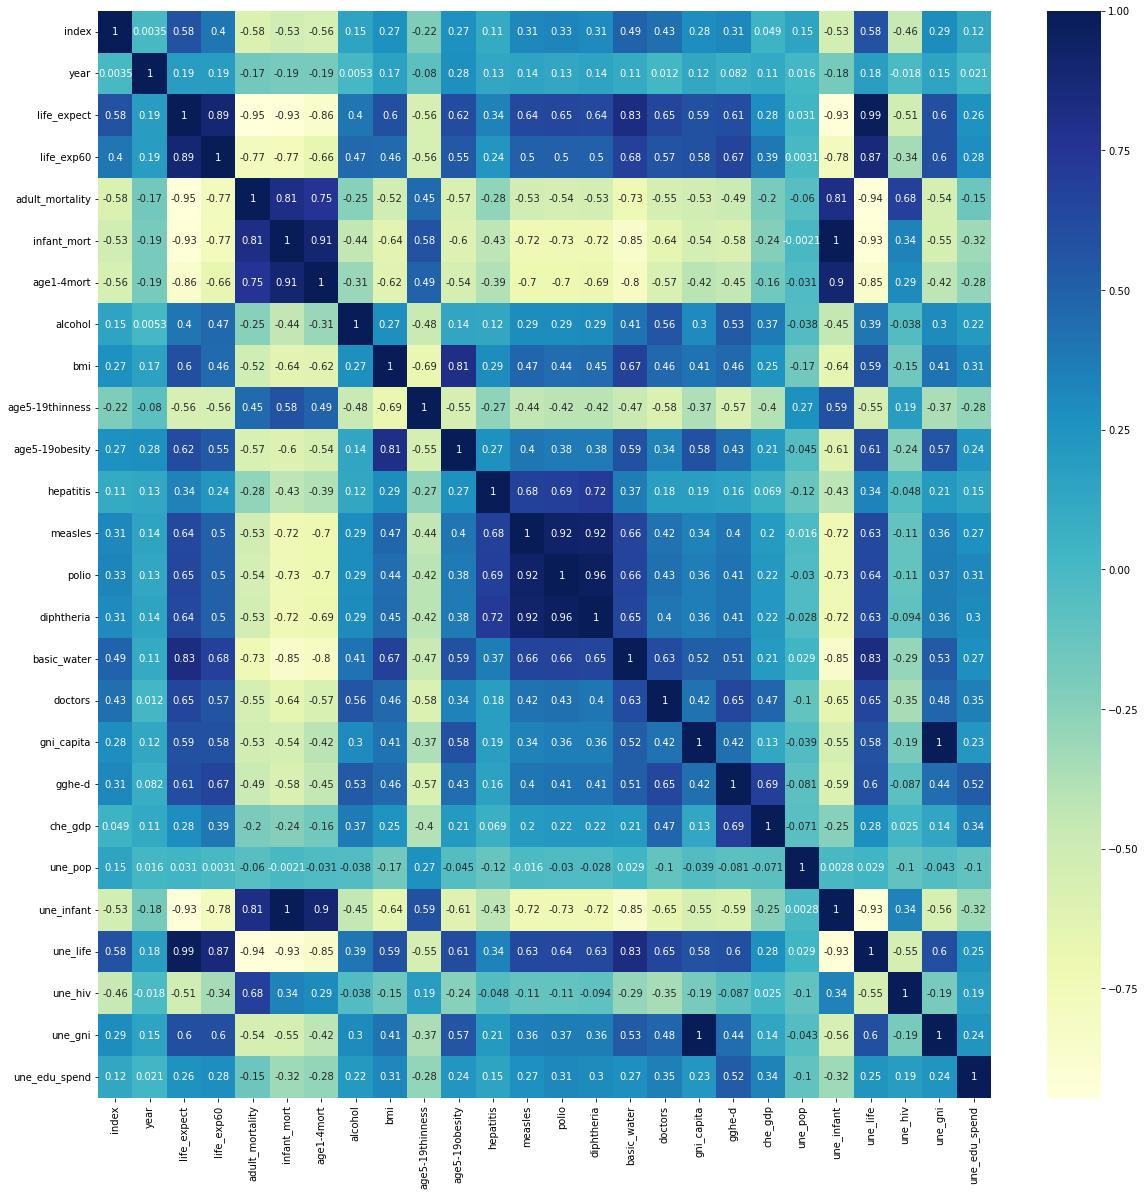

In [12]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), cmap = 'YlGnBu', annot = True)
plt.show()

In [13]:
# we see that columns "une_gni" , "une_life" ,"life_exp60" , "age1-4mort" ,"polio", "diphtheria" and "une_infant" can be disregarded as they have coreelation >0.85 with their corresponding features.
df.drop(['index','une_gni','une_life','une_infant','life_exp60','age1-4mort','polio','diphtheria'],axis = 1, inplace = True)

In [14]:
df.shape

(3098, 20)

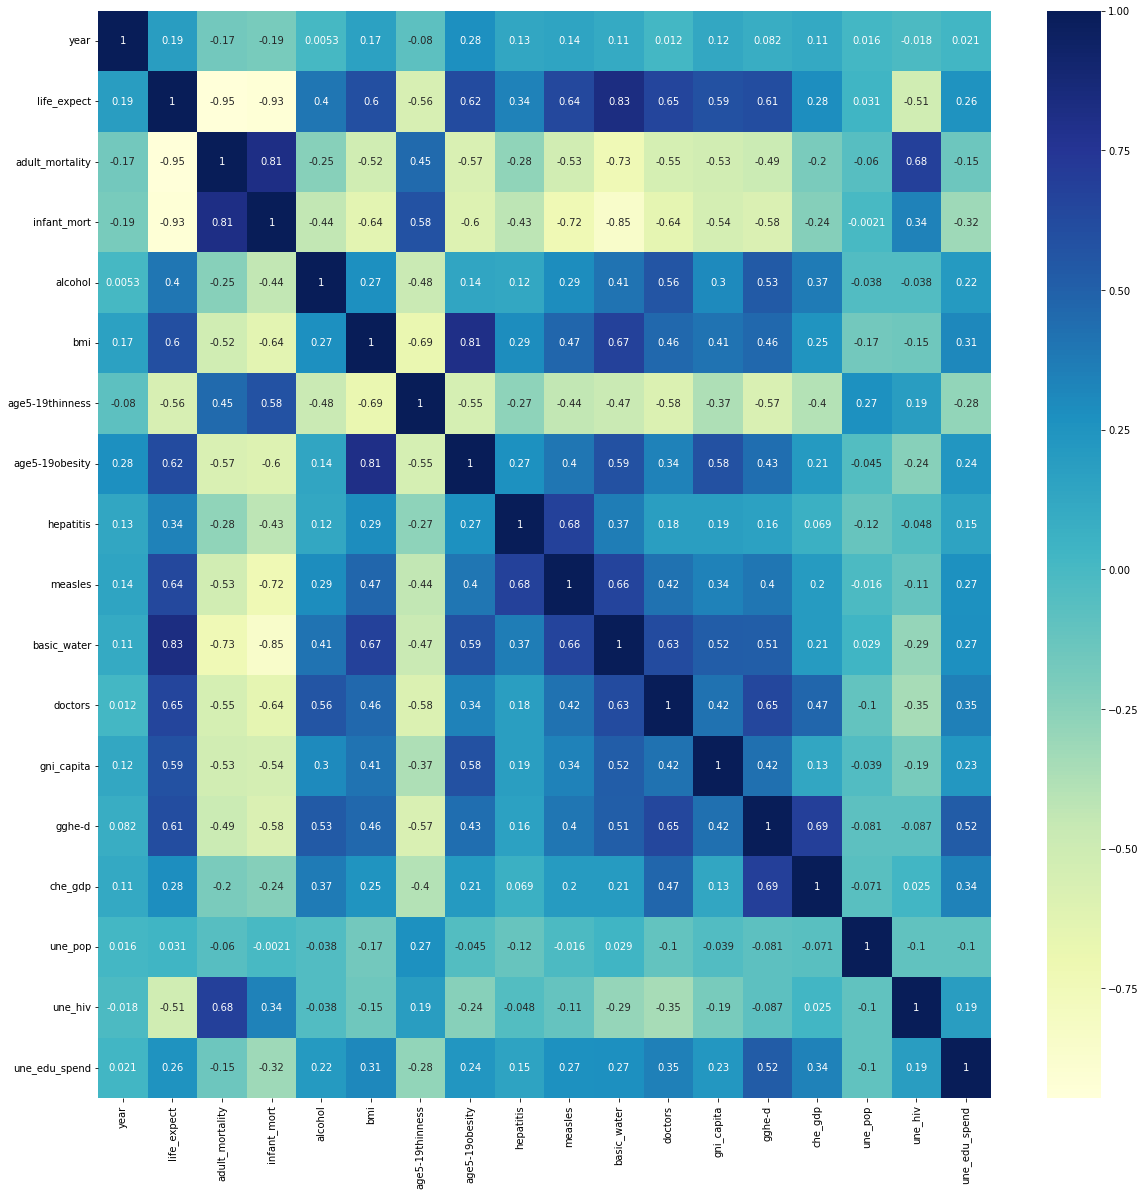

In [15]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), cmap = 'YlGnBu', annot = True)
plt.show()

<AxesSubplot: >

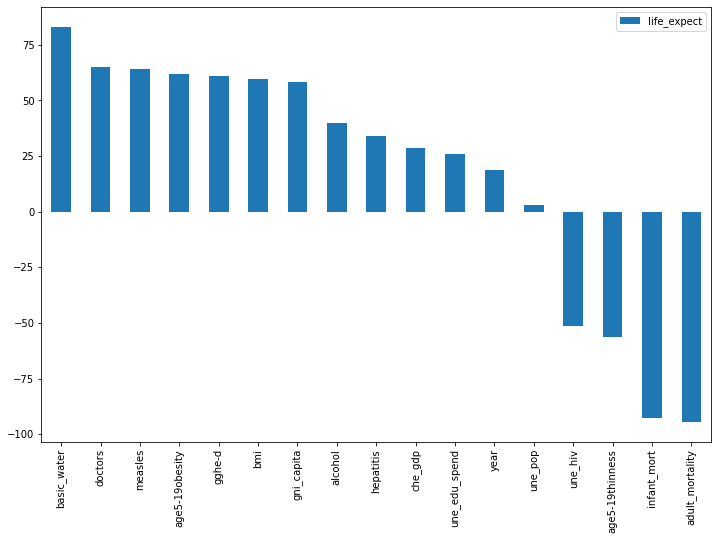

In [16]:
pd.DataFrame((df.corr()['life_expect'].drop('life_expect')*100).sort_values(ascending=False)).plot.bar(figsize = (12,8))

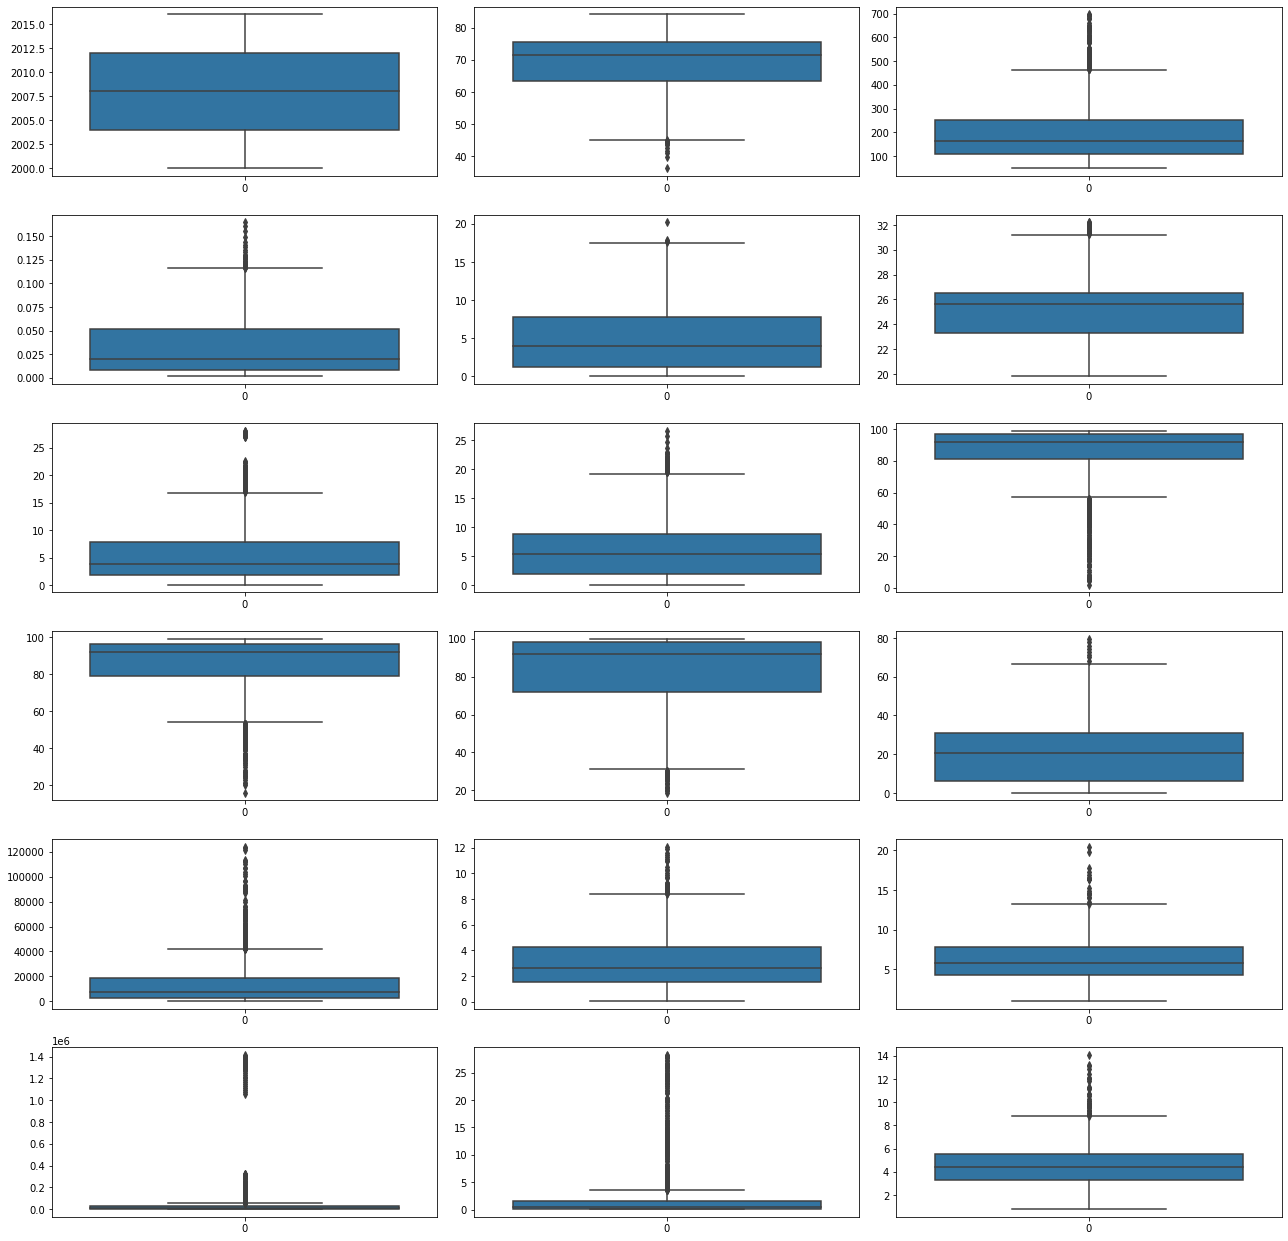

In [17]:
n=1
plt.figure(figsize=(18,20))
for column in df.describe().columns:
    plt.subplot(7,3,n)
    n=n+1
    sns.boxplot(df[column]) 
    plt.tight_layout()


In [18]:
df.columns

Index(['country', 'region', 'year', 'life_expect', 'adult_mortality',
       'infant_mort', 'alcohol', 'bmi', 'age5-19thinness', 'age5-19obesity',
       'hepatitis', 'measles', 'basic_water', 'doctors', 'gni_capita',
       'gghe-d', 'che_gdp', 'une_pop', 'une_hiv', 'une_edu_spend'],
      dtype='object')

In [19]:
a = df.groupby('region')
a.mean()

,year,life_expect,adult_mortality,infant_mort,alcohol,bmi,age5-19thinness,age5-19obesity,hepatitis,measles,basic_water,doctors,gni_capita,gghe-d,che_gdp,une_pop,une_hiv,une_edu_spend
region,,,,,,,,,,,,,,,,,,
Africa,2008.041878,57.750500,331.825562,0.067048,3.476394,23.004220,8.453836,1.914194,79.672881,73.744924,61.776346,2.630109,3663.560372,1.754467,5.540505,17612.992721,5.500133,4.056166
Americas,2008.000000,73.205263,158.033066,0.019537,5.787522,26.418182,2.572906,8.993761,88.091089,91.659537,92.275967,18.762866,11968.394495,3.484724,6.692057,26677.098011,0.828241,4.738977
Eastern Mediterranean,2008.000000,69.741827,157.469200,0.033116,0.546204,26.134118,7.505588,9.390882,86.354037,83.462185,83.066433,13.859815,25121.416309,2.210394,4.801979,27135.915059,0.226471,4.315646
Europe,2008.000000,75.805259,122.783309,0.010885,8.497406,26.034118,1.868000,6.317529,88.753918,92.908768,96.546745,30.481027,20674.863702,4.796173,7.493527,17955.080038,0.204874,4.978075
South-East Asia,2008.081081,68.767738,177.039076,0.036224,1.587513,22.328108,14.709189,2.851892,81.850000,86.470270,85.731018,7.085979,5179.756098,1.554019,3.794549,162182.790784,0.470588,3.550025
Western Pacific,2008.000000,72.233377,150.959250,0.023231,3.532467,25.468067,3.940616,7.680672,86.113150,86.137255,84.956216,14.211905,13994.705882,3.192861,5.556877,89410.073894,0.315508,4.660651


In [20]:
a.median()

,year,life_expect,adult_mortality,infant_mort,alcohol,bmi,age5-19thinness,age5-19obesity,hepatitis,measles,basic_water,doctors,gni_capita,gghe-d,che_gdp,une_pop,une_hiv,une_edu_spend
region,,,,,,,,,,,,,,,,,,
Africa,2008.0,57.547870,309.1389,0.065165,2.801010,22.90,8.2,1.40,84.0,75.5,60.348815,1.1060,1580.0,1.482775,4.95832,9904.384,2.2,3.760635
Americas,2008.0,73.541640,154.3351,0.017055,5.705065,26.40,2.2,8.60,92.0,94.0,94.128595,15.4205,9410.0,2.953680,6.07236,6280.599,0.5,4.625485
Eastern Mediterranean,2008.0,72.672550,127.0041,0.019695,0.210030,26.35,6.2,9.65,95.0,94.0,91.626900,13.8040,10470.0,2.147270,4.38930,11397.188,0.1,3.971880
Europe,2008.0,76.143355,106.6299,0.005287,9.510030,26.00,1.9,6.30,95.0,95.0,99.507760,30.8640,18860.0,4.725290,7.39964,7556.827,0.1,4.945070
South-East Asia,2008.0,68.473630,176.5848,0.036005,0.973760,22.20,14.4,2.10,92.0,88.0,87.676450,5.1885,4880.0,0.942290,3.51098,26883.535,0.3,3.517210
Western Pacific,2008.0,71.813050,146.0833,0.018915,2.133150,25.30,1.7,6.50,92.0,92.0,91.139340,12.6760,4640.0,2.364620,4.55693,5323.700,0.2,4.652995


In [21]:

for column in df[['alcohol', 'bmi', 'doctors',  ]]:
    df[column] = df.groupby(['region'])[column].transform(lambda region: region.fillna(region.mean()))


In [22]:
for column in df[['adult_mortality','infant_mort','age5-19thinness','age5-19obesity','hepatitis', 'measles', 'basic_water','gghe-d',
       'che_gdp', 'une_pop','une_edu_spend']]:
    df[column] = df.groupby(['region'])[column].transform(lambda region: region.fillna(region.median()))

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3098 entries, 0 to 3097
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          3098 non-null   object 
 1   region           3098 non-null   object 
 2   year             3098 non-null   int64  
 3   life_expect      3098 non-null   float64
 4   adult_mortality  3098 non-null   float64
 5   infant_mort      3098 non-null   float64
 6   alcohol          3098 non-null   float64
 7   bmi              3098 non-null   float64
 8   age5-19thinness  3098 non-null   float64
 9   age5-19obesity   3098 non-null   float64
 10  hepatitis        3098 non-null   float64
 11  measles          3098 non-null   float64
 12  basic_water      3098 non-null   float64
 13  doctors          3098 non-null   float64
 14  gni_capita       2424 non-null   float64
 15  gghe-d           3098 non-null   float64
 16  che_gdp          3098 non-null   float64
 17  une_pop       

In [24]:
df.isnull().sum()

country              0
region               0
year                 0
life_expect          0
adult_mortality      0
infant_mort          0
alcohol              0
bmi                  0
age5-19thinness      0
age5-19obesity       0
hepatitis            0
measles              0
basic_water          0
doctors              0
gni_capita         674
gghe-d               0
che_gdp              0
une_pop              0
une_hiv            739
une_edu_spend        0
dtype: int64

# fill null values by regression model

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
df['gni_capita'].isnull().sum()

674

In [28]:
# fill missing value of 'gni_capita' by linear regression model
data = df.copy()
from sklearn.model_selection import train_test_split
data.drop(['une_hiv','country','region'], axis=1,inplace=True)
data.dropna(inplace=True)
x = data.drop('gni_capita',axis=1)
sc.fit(x)
x = sc.transform(x)
y = data['gni_capita']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
from sklearn.preprocessing import PolynomialFeatures
x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_train)
model = LinearRegression().fit(x_, y_train)
y_pred = model.predict(x_)
print(r2_score(y_train,y_pred))
x_test = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_test)
y_test_pred = model.predict(x_test)
print(r2_score(y_test,y_test_pred))

0.8708582040195558
0.8376298180467339


In [29]:
data2 = df[df['gni_capita'].isnull()]
data2.drop(['gni_capita','une_hiv','country','region'],axis=1,inplace=True)
x_null = PolynomialFeatures(degree=2, include_bias=False).fit_transform(data2)
df['gni_capita'][df['gni_capita'].isnull()] = model.predict(x_null)

In [30]:
df['gni_capita'].isnull().sum()

0

In [31]:
# fill missing value of 'une_hiv' by linear regression model
data = df.copy()
data.dropna(inplace=True)
x = data.drop(['une_hiv','country','region'],axis=1)
sc.fit(x)
x = sc.transform(x)
y = data['une_hiv']
lr = LinearRegression()
lr.fit(x,y)
ypred = lr.predict(x)
r2_score(y,ypred)

0.70522814618286

In [32]:
data2 = df[df['une_hiv'].isnull()]
data2.drop(['une_hiv','country','region'],axis=1,inplace=True)
df['une_hiv'][df['une_hiv'].isnull()] = lr.predict(data2)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3098 entries, 0 to 3097
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          3098 non-null   object 
 1   region           3098 non-null   object 
 2   year             3098 non-null   int64  
 3   life_expect      3098 non-null   float64
 4   adult_mortality  3098 non-null   float64
 5   infant_mort      3098 non-null   float64
 6   alcohol          3098 non-null   float64
 7   bmi              3098 non-null   float64
 8   age5-19thinness  3098 non-null   float64
 9   age5-19obesity   3098 non-null   float64
 10  hepatitis        3098 non-null   float64
 11  measles          3098 non-null   float64
 12  basic_water      3098 non-null   float64
 13  doctors          3098 non-null   float64
 14  gni_capita       3098 non-null   float64
 15  gghe-d           3098 non-null   float64
 16  che_gdp          3098 non-null   float64
 17  une_pop       

In [34]:
df.isnull().sum()

country            0
region             0
year               0
life_expect        0
adult_mortality    0
infant_mort        0
alcohol            0
bmi                0
age5-19thinness    0
age5-19obesity     0
hepatitis          0
measles            0
basic_water        0
doctors            0
gni_capita         0
gghe-d             0
che_gdp            0
une_pop            0
une_hiv            0
une_edu_spend      0
dtype: int64

In [35]:
a = df.groupby(['region','year'])['life_expect'].mean()
a = pd.DataFrame(a)
# a.head(50)
# # df.set_index('year',inplace = True)
# # df.groupby('region')['life_expect'].plot(legend = True)

# Distribution of class label

<AxesSubplot: xlabel='life_expect', ylabel='Density'>

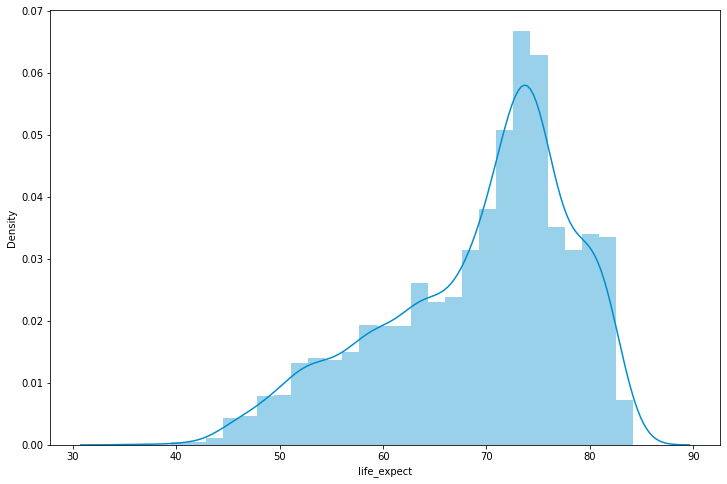

In [36]:
plt.figure(figsize=(12,8))
sns.distplot(df['life_expect'], color="#008dce")

# one hot encoding

In [37]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False,drop = 'first')
finaldf = pd.DataFrame(enc.fit_transform(df[['region','country']]))

In [38]:
final_df = pd.merge(df.drop(['region','country'],axis = 1),finaldf,left_index = True,right_index = True)
final_df.sample(5)

,year,life_expect,adult_mortality,infant_mort,alcohol,bmi,age5-19thinness,age5-19obesity,hepatitis,measles,...,177,178,179,180,181,182,183,184,185,186
1960,2016,81.63280,58.63288,0.002830,8.29649,25.6,0.9,7.0,93.0,94.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
258,2014,53.09803,374.46660,0.084670,0.50451,21.8,8.8,1.3,36.0,45.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2561,2005,67.79711,154.47000,0.051980,0.00043,20.6,20.3,0.9,45.0,88.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1828,2003,64.30225,217.54160,0.064085,2.56690,25.0,3.5,2.1,97.0,97.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1193,2014,79.41757,95.26566,0.008370,3.63573,27.2,1.7,11.4,91.0,95.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# MODEL BUILDING

In [39]:
x = final_df.drop('life_expect',axis=1)

In [40]:
sc.fit(x)
x = sc.transform(x)

In [41]:
y = final_df['life_expect']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
lr = LinearRegression()
model = lr.fit(X_train,y_train)
ypred = lr.predict(X_train)
print(r2_score(y_train,ypred))

0.9983292401934933


In [43]:
ypred = lr.predict(X_test)
print(r2_score(y_test,ypred))

0.9984220402801652


In [44]:
model.coef_

array([ 5.98180480e-01, -5.02456775e+00, -2.40121844e+00, -8.57639596e-02,
       -5.28405601e-01,  4.68181409e-01, -3.05345503e-01, -4.83440463e-03,
        1.45792255e-01, -8.49095651e-02,  3.46747599e-02, -1.78058399e-01,
        2.05272075e-01, -8.06925205e-02,  7.59558742e-02, -1.81839381e-01,
        6.51797216e-02, -4.00123889e+09, -2.11790288e+10, -1.27683619e+10,
       -1.55819271e+10, -7.61159437e+09, -2.78594032e+09, -4.89990573e+09,
       -4.89990573e+09, -4.13232666e+09, -4.13232666e+09, -2.78594032e+09,
       -3.13891399e+09, -2.78594032e+09, -2.78594032e+09, -4.13232666e+09,
        3.25585775e-01, -4.21533876e+07, -4.13232666e+09, -2.78594032e+09,
       -2.78594032e+09, -4.13232666e+09, -4.89990573e+09, -4.21533875e+07,
       -4.13232666e+09, -2.78594032e+09, -4.89990573e+09, -4.13232666e+09,
       -3.13891399e+09, -2.78594032e+09, -4.89990573e+09, -4.89990573e+09,
       -4.89990573e+09, -3.13891399e+09, -4.89990573e+09, -4.13232666e+09,
       -4.89990573e+09, -

In [45]:
print(f"intercept: {model.intercept_}")

intercept: 69.20224861455368


In [46]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,ypred)

0.1356302380900349

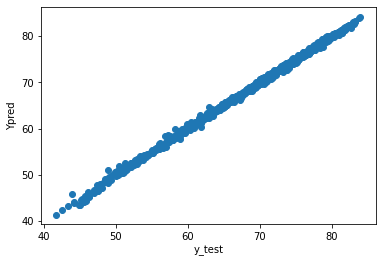

In [47]:
plt.scatter(y_test, ypred)
plt.xlabel("y_test")
plt.ylabel("Ypred")
plt.show()


# ANN model

In [48]:
import tensorflow as tf

In [49]:
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
 
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2075, 204)
(2075,)
(1023, 204)
(1023,)


In [50]:
from keras.models import Sequential
from keras.layers import Dense
 
# create ANN model
model = Sequential()
 
# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=5, input_dim=204, kernel_initializer='normal', activation='relu'))
 
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
 
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal',activation = 'linear'))
 
# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam',metrics = ['mape'])
 
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 10, epochs = 100, verbose=1)

Epoch 1/100
208/208 [==============================] - 6s 5ms/step - loss: 4802.4907 - mape: 99.0019
Epoch 2/100
208/208 [==============================] - 1s 4ms/step - loss: 4544.0190 - mape: 96.1842
Epoch 3/100
208/208 [==============================] - 1s 4ms/step - loss: 4352.1870 - mape: 94.0499
Epoch 4/100
208/208 [==============================] - 1s 4ms/step - loss: 4179.9492 - mape: 92.0977
Epoch 5/100
208/208 [==============================] - 1s 4ms/step - loss: 4015.8567 - mape: 90.1973
Epoch 6/100
208/208 [==============================] - 1s 5ms/step - loss: 3858.4639 - mape: 88.3450
Epoch 7/100
208/208 [==============================] - 1s 4ms/step - loss: 3707.4006 - mape: 86.5186
Epoch 8/100
208/208 [==============================] - 1s 4ms/step - loss: 3561.7039 - mape: 84.7174
Epoch 9/100
208/208 [==============================] - 1s 4ms/step - loss: 3420.6042 - mape: 82.9503
Epoch 10/100
208/208 [==============================] - 1s 4ms/step - loss: 3283.7378 - map

In [51]:
# Generating Predictions on testing data
Predictions = model.predict(X_test)
Predictions

32/32 [==============================] - 2s 9ms/step


array([[78.473076],
       [78.454575],
       [70.40262 ],
       ...,
       [56.865   ],
       [59.275337],
       [73.527664]], dtype=float32)

In [52]:
print(r2_score(y_test,Predictions))

0.970986892310353


In [53]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,Predictions)

2.493761186813314

Text(0, 0.5, 'life expectancy')

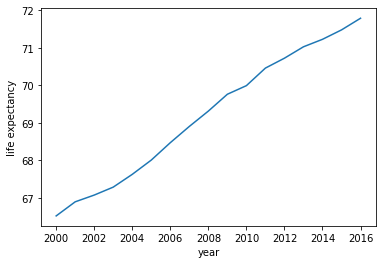

In [54]:
df.groupby('year')['life_expect'].mean().plot()
plt.xlabel('year')
plt.ylabel('life expectancy')

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Africa'),
  Text(1, 0, 'Americas'),
  Text(2, 0, 'Eastern Mediterranean'),
  Text(3, 0, 'Europe'),
  Text(4, 0, 'South-East Asia'),
  Text(5, 0, 'Western Pacific')])

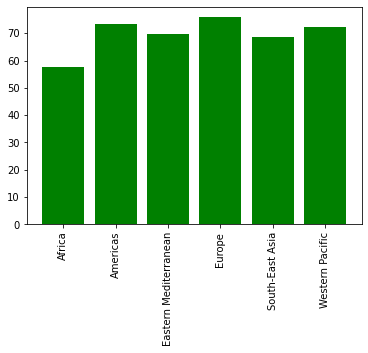

In [55]:
x = pd.DataFrame(df.groupby(['region'])['life_expect'].mean())
plt.bar(x.index.values,x['life_expect'],color = 'g')
plt.xticks(rotation = 90)

In [56]:
x = pd.DataFrame(df.groupby(['region','year'])['life_expect'].mean())
x.reset_index(inplace = True)

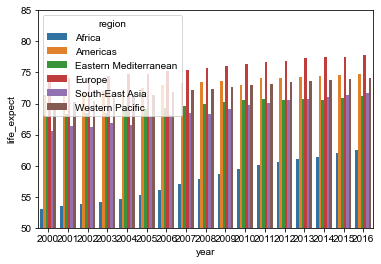

In [57]:
sns.barplot(x='year',y = 'life_expect',hue='region',data=x)
plt.ylim(50,85)
sns.set(rc={'figure.figsize':(100,7)})